# Notebook for plotting results of filtering with noise

In [93]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 11, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)

figure_path = module_path + '/figures/'

def get_plotable_arrays(result_dict):
    noise = []
    clf_dict = {k : [] for k in result_dict[list(result_dict.keys())[0]].keys()}
    for n, subdict in result_dict.items():
        noise.append(n)
        for clf, res in subdict.items():
            clf_dict[clf].append(res)
    return noise, clf_dict

# Plotting AUC score simulated data

In [94]:
simulated_data_lr_amount = {2: {'knnOptimal': 0.6822019103673592, 'nb': 0.6872495828462376},
 3: {'knnOptimal': 0.7088178364040434, 'nb': 0.7180383683988357},
 4: {'knnOptimal': 0.7188006979093329, 'nb': 0.7276267407857785},
 5: {'knnOptimal': 0.7268428739016973, 'nb': 0.7345459314768779},
 7: {'knnOptimal': 0.7424606462303232, 'nb': 0.7440799854351258},
 10: {'knnOptimal': 0.755892255892256, 'nb': 0.7600658125218959},
 12: {'knnOptimal': 0.75414241518536, 'nb': 0.759649523229864}}


simulated_data_lr_amplitude = {5: {'knnOptimal': 0.7518487422094489, 'nb': 0.7645613262910799},
 10: {'knnOptimal': 0.7349013299854841, 'nb': 0.746090219304505},
 15: {'knnOptimal': 0.7188006979093329, 'nb': 0.7276267407857785},
 20: {'knnOptimal': 0.7027675470116181, 'nb': 0.7109465704464225},
 25: {'knnOptimal': 0.6965808809954583, 'nb': 0.7013023702573664},
 30: {'knnOptimal': 0.6934935405451059, 'nb': 0.6949493700065782},
 35: {'knnOptimal': 0.687720008837175, 'nb': 0.6944500402900886},
 40: {'knnOptimal': 0.6820652173913043, 'nb': 0.6928778260385344}}

simulated_data_original_amount = {2: {'knnOptimal': 0.6817294971706819, 'nb': 0.6906482418205467},
 3: {'knnOptimal': 0.7032523262665228, 'nb': 0.7188413691898922},
 4: {'knnOptimal': 0.7056175028626697, 'nb': 0.719577881290925},
 5: {'knnOptimal': 0.7172127046947783, 'nb': 0.7279157541328056},
 7: {'knnOptimal': 0.7254727573901346, 'nb': 0.7362536269746862},
 10: {'knnOptimal': 0.737843381396538, 'nb': 0.7504085557692521},
 12: {'knnOptimal': 0.7378044713232761, 'nb': 0.7503696456959901}}

simulated_data_original_amplitude = {5: {'knnOptimal': 0.736214716901424, 'nb': 0.7519983101911041},
 10: {'knnOptimal': 0.7198502518037597, 'nb': 0.7336549899389667},
 15: {'knnOptimal': 0.7056175028626697, 'nb': 0.719577881290925},
 20: {'knnOptimal': 0.6955342353058888, 'nb': 0.7079048593122922},
 25: {'knnOptimal': 0.6921990861691365, 'nb': 0.7003813187179686},
 30: {'knnOptimal': 0.6906093317472846, 'nb': 0.6961929272603973},
 35: {'knnOptimal': 0.6847922757945992, 'nb': 0.6953785950128404},
 40: {'knnOptimal': 0.6840168536203043, 'nb': 0.6953785950128404}}

simulated_data_clustering_amount = {2: {'knnOptimal': 0.6513908758543951, 'nb': 0.6908304127029541},
 3: {'knnOptimal': 0.6704931972789114, 'nb': 0.7167011732229124},
 4: {'knnOptimal': 0.6626762445281481, 'nb': 0.7142178512132372},
 5: {'knnOptimal': 0.6742190150744026, 'nb': 0.7181655016058947},
 7: {'knnOptimal': 0.6807585612047462, 'nb': 0.7259921341193426},
 10: {'knnOptimal': 0.6866633767195115, 'nb': 0.7353693395516774},
 12: {'knnOptimal': 0.6862745098039216, 'nb': 0.7361861657618889}}

simulated_data_clustering_amplitude = {5: {'knnOptimal': 0.6741202056148674, 'nb': 0.7335892490198302},
 10: {'knnOptimal': 0.6658102969890043, 'nb': 0.7230100406095153},
 15: {'knnOptimal': 0.6626762445281481, 'nb': 0.7142178512132372},
 20: {'knnOptimal': 0.6592369210474578, 'nb': 0.7085570437740031},
 25: {'knnOptimal': 0.6494070719453248, 'nb': 0.7008860153256705},
 30: {'knnOptimal': 0.6490109556652738, 'nb': 0.7047484334417936},
 35: {'knnOptimal': 0.6480187789910039, 'nb': 0.7015675963044384},
 40: {'knnOptimal': 0.6437483116703626, 'nb': 0.7033203125}}

results_amplitude = {
    'Cluster filter' : simulated_data_clustering_amplitude,
    'Original': simulated_data_original_amplitude,
    'LR filter': simulated_data_lr_amplitude
}

results_amount = {
    'Cluster filter' : simulated_data_clustering_amount,
    'Original': simulated_data_original_amount,
    'LR filter': simulated_data_lr_amount
}

## Plotting results of adding noise with a higher amplitude

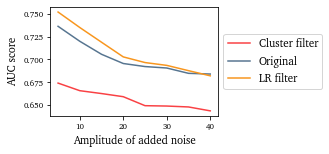

In [95]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amplitude.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = font)

f.savefig(figure_path + 'simulated_data_higher_amplitude_noise.pdf', bbox_inches='tight')

## Plotting results of adding more noise

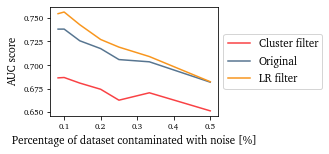

In [96]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amount.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = font)

f.savefig(figure_path + 'simulated_data_more_noise.pdf', bbox_inches='tight')

# Lung sound dataset

In [97]:
lung_lr_amount = {2: {'knnOptimal': 0.5932476763258612, 'nb': 0.5434842062081225},
 3: {'knnOptimal': 0.6467558810357998, 'nb': 0.5675567423230975},
 4: {'knnOptimal': 0.6713486084955013, 'nb': 0.5669134786781845},
 5: {'knnOptimal': 0.6770963704630788, 'nb': 0.5824371598859808},
 7: {'knnOptimal': 0.6914301474275398, 'nb': 0.5926916221033868},
 10: {'knnOptimal': 0.6961269729566704, 'nb': 0.6044181483023131},
 12: {'knnOptimal': 0.7005813953488372, 'nb': 0.6147186147186148}}


lung_lr_amplitude = {5: {'knnOptimal': 0.6713486084955013, 'nb': 0.5714285714285714},
 10: {'knnOptimal': 0.6713486084955013, 'nb': 0.5707013574660633},
 15: {'knnOptimal': 0.6713486084955013, 'nb': 0.5669134786781845},
 20: {'knnOptimal': 0.6713486084955013, 'nb': 0.5669134786781845},
 25: {'knnOptimal': 0.6713486084955013, 'nb': 0.5638353996307044},
 30: {'knnOptimal': 0.6713486084955013, 'nb': 0.5640756302521008},
 35: {'knnOptimal': 0.6713486084955013, 'nb': 0.5640756302521008},
 40: {'knnOptimal': 0.6713486084955013, 'nb': 0.5640756302521008}}

lung_original_amount = {2: {'knnOptimal': 0.6186781421833909, 'nb': 0.5696210326516123},
 3: {'knnOptimal': 0.6690465323509596, 'nb': 0.5773909137669978},
 4: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 5: {'knnOptimal': 0.7024769439192078, 'nb': 0.5845413777864714},
 7: {'knnOptimal': 0.7200850521252165, 'nb': 0.6005701535140148},
 10: {'knnOptimal': 0.7264929400940355, 'nb': 0.6023233574579993},
 12: {'knnOptimal': 0.7327631798193186, 'nb': 0.6054675331261365}}

lung_original_amplitude = {5: {'knnOptimal': 0.687549354139952, 'nb': 0.58024530365927},
 10: {'knnOptimal': 0.6860714466830395, 'nb': 0.58024530365927},
 15: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 20: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 25: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 30: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 35: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927},
 40: {'knnOptimal': 0.6860026225612716, 'nb': 0.58024530365927}}

lung_clustering_amount = {2: {'knnOptimal': 0.6469778108782258, 'nb': 0.575145223087381},
 3: {'knnOptimal': 0.6928871595330741, 'nb': 0.567737119623912},
 4: {'knnOptimal': 0.7091619318181819, 'nb': 0.5723318470733327},
 5: {'knnOptimal': 0.7217021548692372, 'nb': 0.5726478009290217},
 7: {'knnOptimal': 0.7323988039154501, 'nb': 0.5711265620595698},
 10: {'knnOptimal': 0.7358404348754956, 'nb': 0.5700406302338565},
 12: {'knnOptimal': 0.7401354067491802, 'nb': 0.5748715313463515}}

lung_clustering_amplitude = {5: {'knnOptimal': 0.7127808941131784, 'nb': 0.5685965900174468},
 10: {'knnOptimal': 0.7090469142372486, 'nb': 0.570558998758601},
 15: {'knnOptimal': 0.7091619318181819, 'nb': 0.5723318470733327},
 20: {'knnOptimal': 0.7094372506659952, 'nb': 0.572576560430141},
 25: {'knnOptimal': 0.7087442569708492, 'nb': 0.5721024390243903},
 30: {'knnOptimal': 0.7088838343881856, 'nb': 0.5721024390243903},
 35: {'knnOptimal': 0.7088838343881856, 'nb': 0.5734128351830151},
 40: {'knnOptimal': 0.7088838343881856, 'nb': 0.5729341329177599}}

results_amplitude = {
    'Cluster filter' : lung_clustering_amplitude,
    'Original': lung_original_amplitude,
    'LR filter': lung_lr_amplitude
}

results_amount = {
    'Cluster filter' : lung_clustering_amount,
    'Original': lung_original_amount,
    'LR filter': lung_lr_amount
}

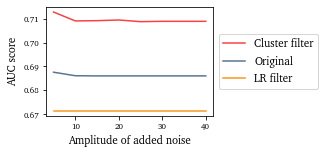

In [98]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amplitude.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = font)
f.savefig(figure_path + 'lung_data_higher_amplitude_noise.pdf', bbox_inches='tight')

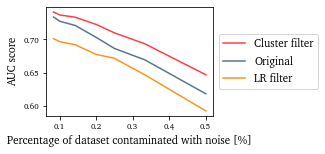

In [99]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amount.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = font)

f.savefig(figure_path + 'lung_data_more_noise.pdf', bbox_inches='tight')